[ 8.36721777 -0.11320037]


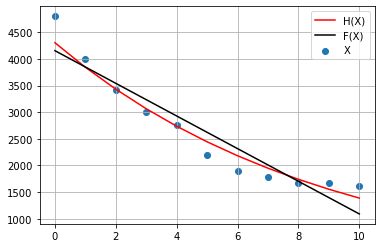

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


x=np.array([0.001,1,2,3,4,5,6,7,8,9,10])
y=np.array([4800,4000,3420,3000,2760,2200,1900, 1790,1680,1675,1620])
Y = np.log(y)
X = np.stack((np.ones(len(x)),x)).T
data = pd.DataFrame([x,y,np.log(y)]).T
Yl = y.copy()
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
wl = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Yl)
f = wl[0] + wl[1]*x
b = np.exp(w[0])
a = w[1]
h = b*np.exp(a*x)
plt.scatter(x,y,label = 'X')
plt.plot(x,h,color='r',label='H(X)')
plt.plot(x,f,color='black',label='F(X)')
plt.legend()
plt.grid()
print(w)

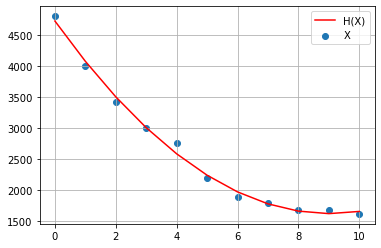

In [165]:
#polynome
Yp = y.copy()
X = np.stack((np.ones(len(x)),x,x**2)).T
x1,x2,x3 = X.copy().T
a1,a2,a3 = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Yp)

hx = a1*x1 + a2*x2 + a3*x3

plt.scatter(x,y,label = 'X')
plt.plot(x,hx,color='r',label='H(X)')
plt.legend()
plt.grid()

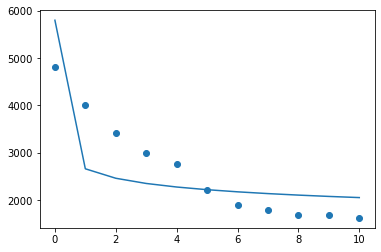

In [166]:
plt.scatter(x,y,label = 'X')
xe = np.stack((np.ones(len(x)),np.log(x))).T
w0,w1 = np.linalg.inv(xe.T.dot(xe)).dot(xe.T.dot(Y))
ye = np.exp(w0)*x**(w1)
plt.plot(x,ye)


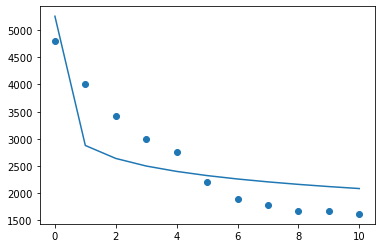

In [167]:
plt.scatter(x,y,label = 'X')
xl = np.stack((np.ones(len(x)),np.log(x))).T
w0,w1 = np.linalg.inv(xl.T.dot(xl)).dot(xl.T.dot(y))
yl = w0 + w1*(xl.T[1])
plt.plot(x,yl)

In [168]:
rssLin = np.sum((f - y).dot((f - y)))
rssE = np.sum((h - y).dot((h - y)))
rssP = np.sum((ye - y).dot((ye - y)))
rssPoly = np.sum((hx - y).dot((hx - y)))
rssL = np.sum((yl - y).dot((yl - y)))

print(rssLin,rssE,rssP,rssPoly,rssL)

1297009.480674383 512714.8986927015 5095762.530404717 60349.46092024951 3424518.904681205


In [169]:
mseLin = np.sum((f - y).dot((f - y)))/len(x)
mseE = np.sum((h - y).dot((h - y)))/len(x)
mseP = np.sum((ye - y).dot((ye - y)))/len(x)
msePoly = np.sum((hx - y).dot((hx - y)))/len(x)
mseL = np.sum((yl - y).dot((yl - y)))/len(x)

print(mseLin,mseE,mseP,msePoly,mseL)

117909.95278858027 46610.44533570013 463251.1391277015 5486.314629113592 311319.9004255641


In [170]:
rmseLin = np.sqrt(np.sum((f - y).dot((f - y)))/len(x))
rmseE = np.sqrt( np.sum((h - y).dot((h - y)))/len(x))
rmseP = np.sqrt( np.sum((ye - y).dot((ye - y)))/len(x))
rmsePoly = np.sqrt( np.sum((hx - y).dot((hx - y)))/len(x))
rmseL = np.sqrt( np.sum((yl - y).dot((yl - y)))/len(x))

print(rmseLin,rmseE,rmseP,rmsePoly,mseL)

343.38018694819925 215.89452363526993 680.6255498640214 74.0696606520753 311319.9004255641


In [171]:
yb = np.sum(y)/len(y)
rseLin = np.sum((f - y).dot((f - y)))/np.sum((y - yb).dot((y - yb)))
rseE = np.sum((h - y).dot((h - y)))/np.sum((y - yb).dot((y - yb)))
rseP = np.sum((ye - y).dot((ye - y)))/np.sum((y - yb).dot((y - yb)))
rsePoly = np.sum((hx - y).dot((hx - y)))/np.sum((y - yb).dot((y - yb)))
rseL = np.sum((yl - y).dot((yl - y)))/np.sum((y - yb).dot((y - yb)))
print(rseLin,rseE,rseP,rsePoly,rseL)

0.11160845632965374 0.04411942952842089 0.43849347157065355 0.0051931078947346394 0.2946819389665968


# Exercice 

### 1) les coef de correlation

In [172]:
x=np.array([0.01,1,2,3,4,5]) 
y=np.array([4800,3400,2420,2000,1760,1723])

display(pd.DataFrame([x,y],index=['X','Y']).T.corr())
display(pd.DataFrame([np.log(x),y],index=['Log(X)','Y']).T.corr())
display(pd.DataFrame([x,np.log(y)],index=['X','Log(Y)']).T.corr())
display(pd.DataFrame([np.log(x),np.log(y)],index=['Log(X)','Log(Y)']).T.corr())

,X,Y
X,1.000000,-0.915944
Y,-0.915944,1.000000


,Log(X),Y
Log(X),1.000000,-0.954659
Y,-0.954659,1.000000


,X,Log(Y)
X,1.000000,-0.954386
Log(Y),-0.954386,1.000000


,Log(X),Log(Y)
Log(X),1.000000,-0.912142
Log(Y),-0.912142,1.000000


### 2) Quel type d'hypothèse choisir pour ce problème de régression

In [173]:
#hypotese choici doivent des avoire un coef de correlation enter les parametre proche de -1 ou 1 
# puisque ona x et log(y) comme parameter donc le hypotese est de expo 

### 3) Ecrire un scripte pour estimer les paramètres des 4 types d'hypothèses

##### Hypothèse Linèaire

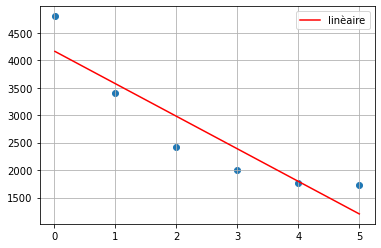

In [174]:
X = np.stack((np.ones(len(x)),x)).T
Y = y.copy()
w0,w1 = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
ylin = w0 + w1*x
plt.scatter(x,y)
plt.plot(x,ylin,color='r',label='linèaire')
plt.legend()
plt.grid()

##### Hypothèse  Exponentielle

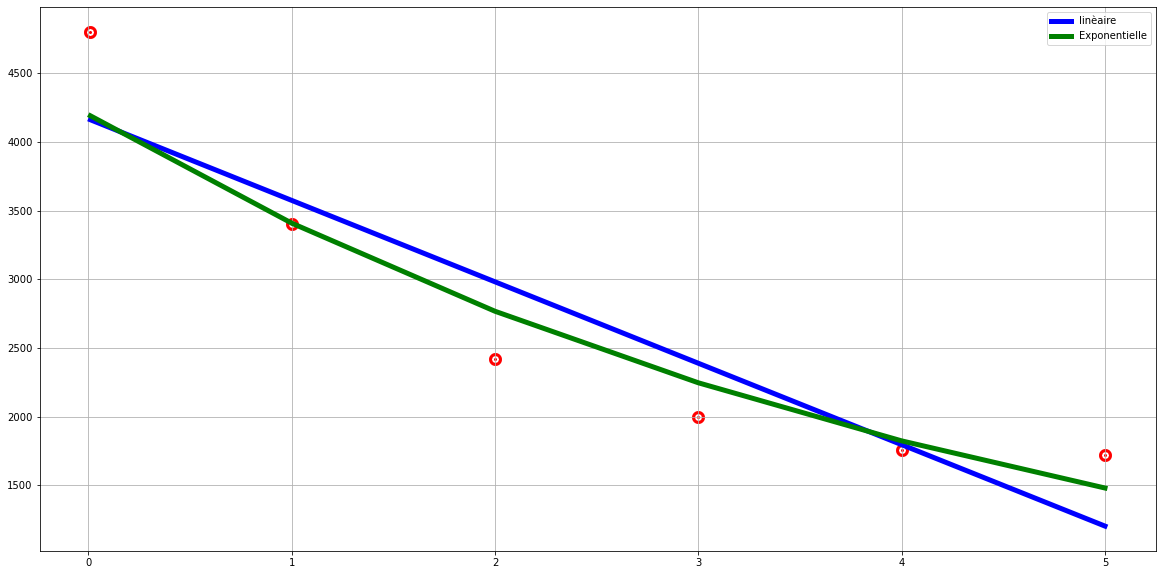

In [193]:
X = np.stack((np.ones(len(x)),x)).T
Y = np.log(y.copy())
w0,w1 = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
ye = np.exp(w0)*np.exp(w1*x)
plt.figure(figsize=(20,10))
plt.scatter(x,y,linewidth=10,marker='.',color='r')
plt.plot(x,ylin,color='b',label='linèaire',linewidth=5)
plt.plot(x,ye,color='green',label='Exponentielle',linewidth=5)
plt.legend()
plt.grid()

##### Hypothèse Puissance

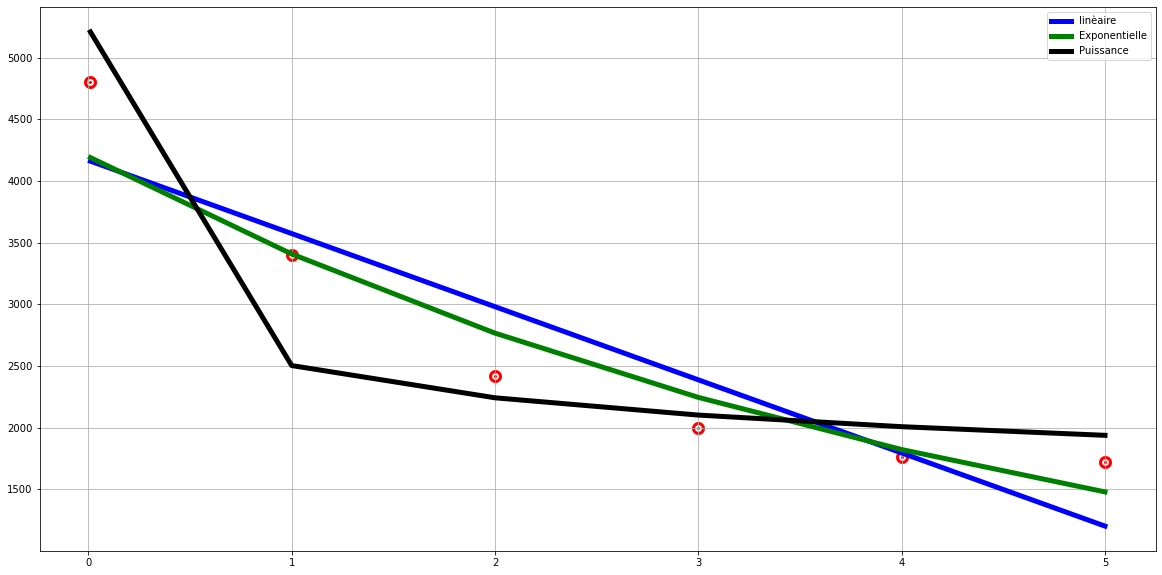

In [176]:
X = np.stack((np.ones(len(x)),np.log(x))).T
Y = np.log(y.copy())
w0,w1 = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
yp = np.exp(w0)*x**w1
plt.figure(figsize=(20,10))
plt.scatter(x,y,linewidth=10,marker='.',color='r')
plt.plot(x,ylin,color='b',label='linèaire',linewidth=5)
plt.plot(x,ye,color='green',label='Exponentielle',linewidth=5)
plt.plot(x,yp,color='black',label='Puissance',linewidth=5)
plt.legend()
plt.grid()

##### Hypothèse Logarithmique

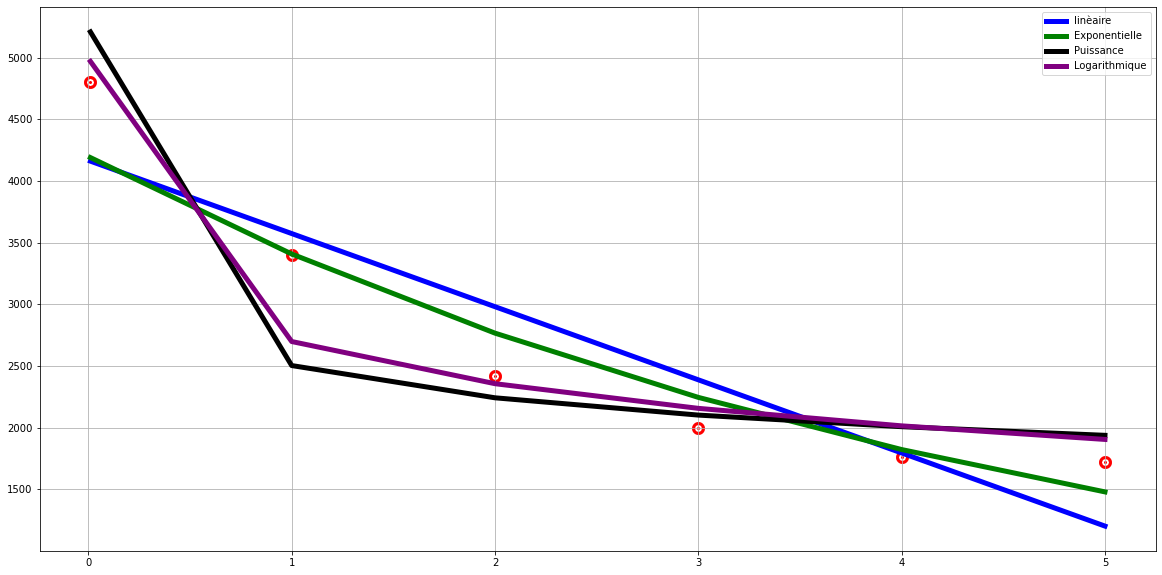

In [200]:
X = np.stack((np.ones(len(x)),np.log(x))).T
Y = y.copy()
w0,w1 = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
ylog = w0 + w1*np.log(x)
plt.figure(figsize=(20,10))
plt.scatter(x,y,linewidth=10,marker='.',color='r')
plt.plot(x,ylin,color='b',label='linèaire',linewidth=5)
plt.plot(x,ye,color='green',label='Exponentielle',linewidth=5)
plt.plot(x,yp,color='black',label='Puissance',linewidth=5)
plt.plot(x,ylog,color='purple',label='Logarithmique',linewidth=5)
plt.legend()
plt.grid()

#####  Hypothèse polynomial

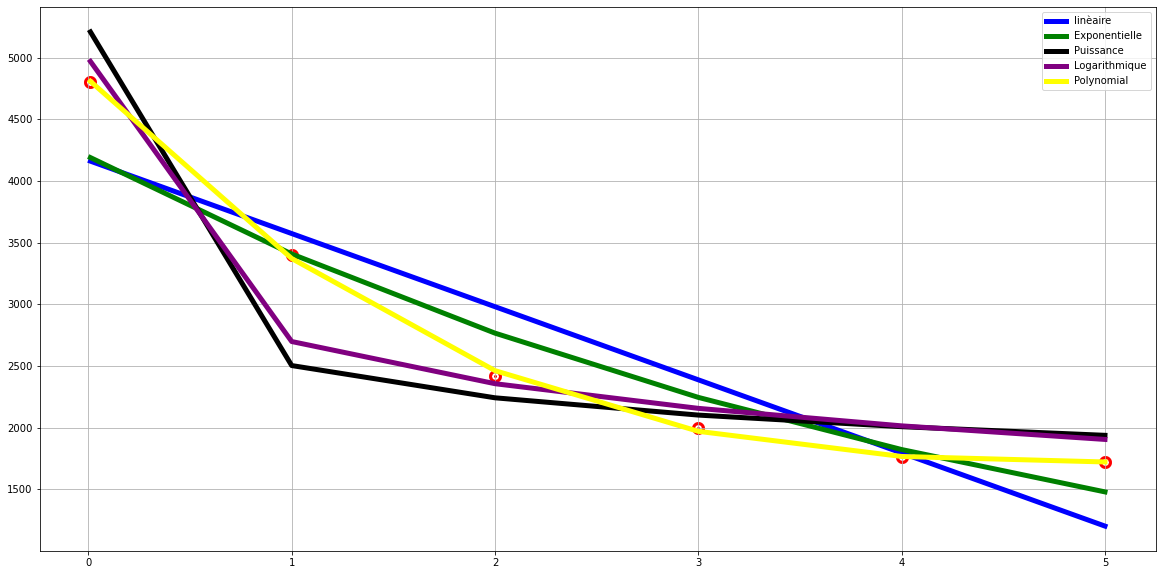

In [224]:
X = np.stack((np.ones(len(x)),x,x**2,x**3)).T
Y = y.copy()
w0,w1,w2,w3 = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
ypoly = w0 + w1*x + w2*x**2 + w3*x**3
plt.figure(figsize=(20,10))
plt.scatter(x,y,linewidth=10,marker='.',color='r')
plt.plot(x,ylin,color='b',label='linèaire',linewidth=5)
plt.plot(x,ye,color='green',label='Exponentielle',linewidth=5)
plt.plot(x,yp,color='black',label='Puissance',linewidth=5)
plt.plot(x,ylog,color='purple',label='Logarithmique',linewidth=5)
plt.plot(x,ypoly,color='yellow',label='Polynomial',linewidth=5)
plt.legend()
plt.grid()

### 4) Evaluer les performances de chaque modèle

In [222]:
yb = np.sum(y)/len(y)
rseLin = (ylin - y).dot((ylin - y))/(y - yb).dot((y - yb))
print("R Line:",1-rseLin)

rseE = (ye - y).dot((ye - y))/(y - yb).dot((y - yb))
print("R Exp:",1-rseE)

rseP = (yp - y).dot((yp - y))/(y - yb).dot((y - yb))
print("R Puiss:",1-rseP)

rseyLog = (ylog - y).dot((ylog - y))/(y - yb).dot((y - yb))
print("R Log:",1-rseyLog)

rsePoly = (ypoly - y).dot((ypoly - y))/(y - yb).dot((y - yb))
print("R Poly:",1-rsePoly)


R Line: 0.8389538994099129
R Exp: 0.9155764090886055
R Puiss: 0.8467779402178843
R Log: 0.9113730827579446
R Poly: 0.9995064923440354


### 5) C'est quoi le prix de vente de cet ordinateur après 20ans

In [236]:
price_10 = w0 + w1*(10) + w2*(10**2) + w3*(10**3)


-21.434483460822037